In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/ASUS/Downloads/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df.groupby("area_type")["area_type"].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
# remove unwanted for model
df2=df.drop(df[["area_type","availability","society","balcony"]],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df2.isnull().sum()/df2.shape[0]*100

location      0.007508
size          0.120120
total_sqft    0.000000
bath          0.548048
price         0.000000
dtype: float64

In [11]:
df2.isnull().sum().sum()

90

In [12]:
df2.isnull().sum().sum()/df2.shape[0]*100

0.6756756756756757

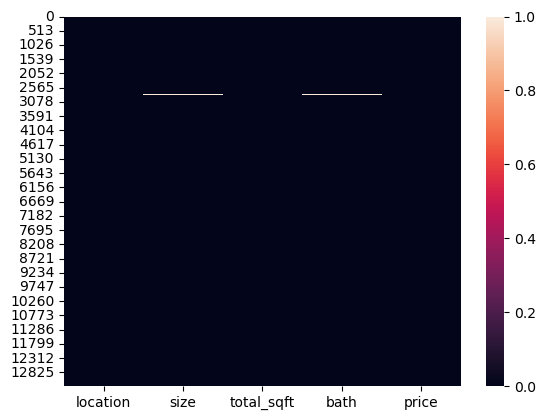

In [13]:
sns.heatmap(df2.isnull())
plt.show()

In [14]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [15]:
df3=df2.dropna()

In [16]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
df3["bhk"]=df3["size"].apply(lambda x: int(x.split(" ")[0]))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1248\2023673167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"]=df3["size"].apply(lambda x: int(x.split(" ")[0]))


In [19]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [20]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [21]:
 df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [23]:
df3[-df3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [24]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
convert_sqft_to_num("2221")

2221.0

In [26]:
convert_sqft_to_num("2100 - 2850")

2475.0

In [27]:
convert_sqft_to_num("34.46Sq. Meter")

In [28]:
df4=df3.copy()
df4["total_sqft"]=df4["total_sqft"].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [29]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [30]:
# Perform EDA

In [31]:
bhk_price = df4.groupby(["bhk"])["price"].mean().reset_index()

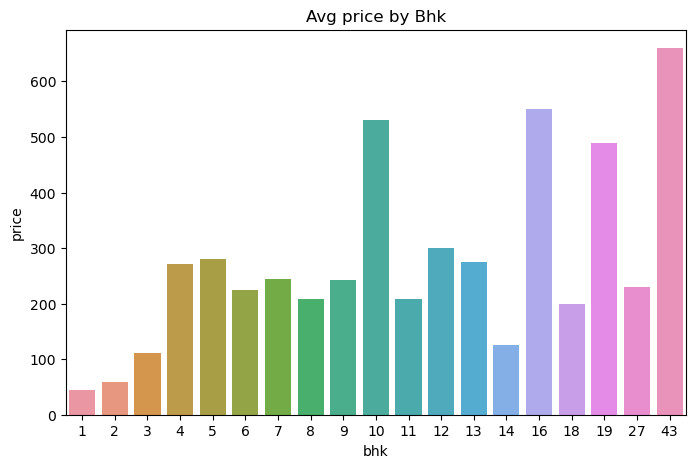

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x=bhk_price["bhk"],y=bhk_price["price"])
plt.title("Avg price by Bhk")
plt.show()

In [33]:
bhk_bath_avg=df4.groupby("bhk")["bath"].mean().reset_index()

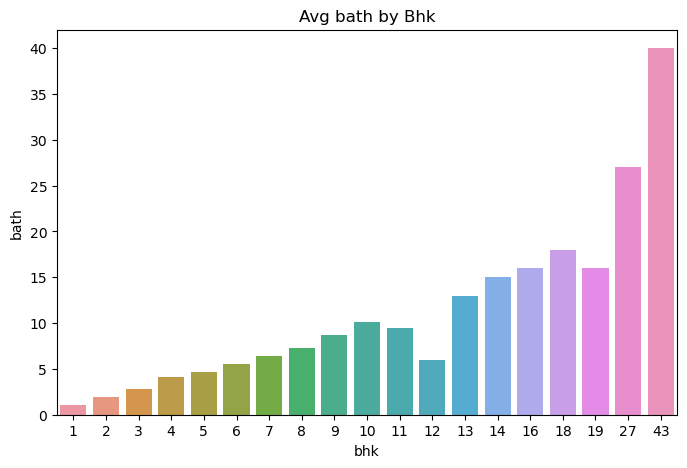

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x=bhk_bath_avg["bhk"],y=bhk_bath_avg["bath"])
plt.title("Avg bath by Bhk")
plt.show()

In [35]:
df4['price_per_sqft'] = df4["price"] * 100000 / df4["total_sqft"]
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [36]:
Avg_price_loc=df4.groupby("location")['price_per_sqft'].mean().reset_index()
sort_Avg_price_loc=Avg_price_loc.sort_values(by=["price_per_sqft"],ascending=False)

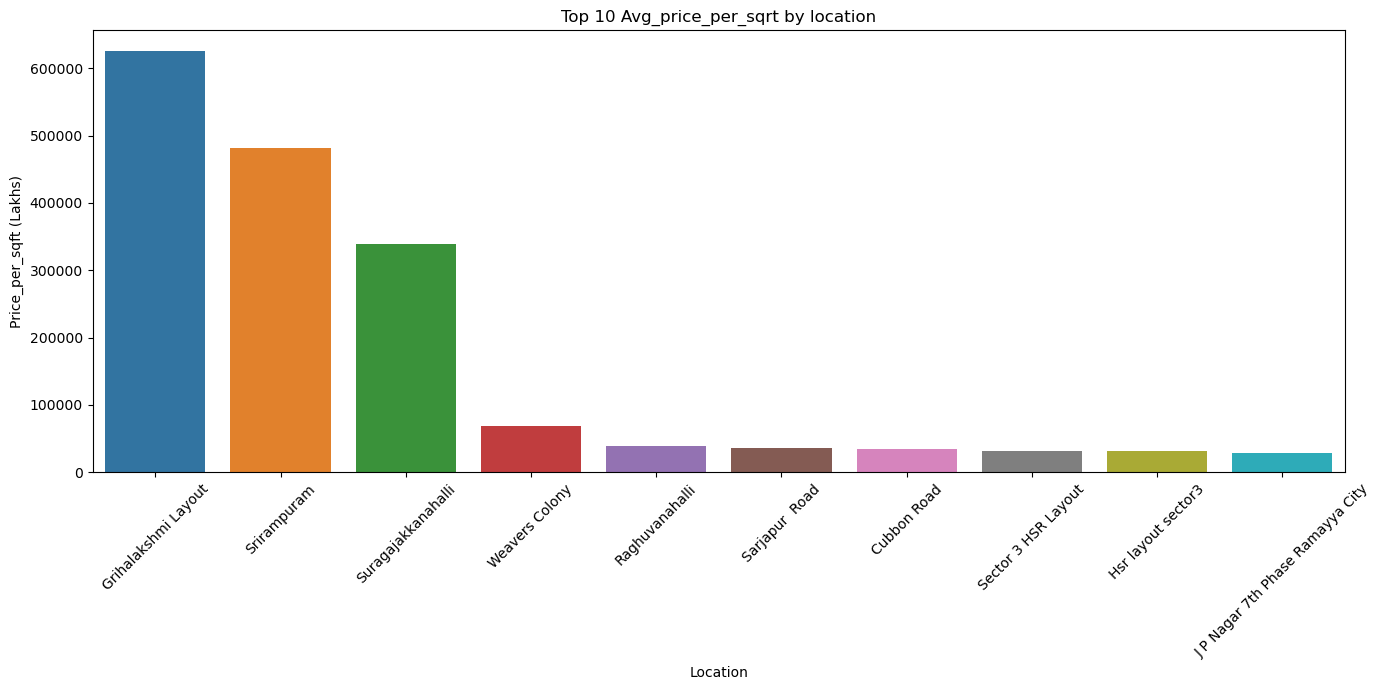

In [37]:
plt.figure(figsize=(14,7))
sns.barplot(x=sort_Avg_price_loc['location'].head(10),y=sort_Avg_price_loc["price_per_sqft"].head(10))
plt.title("Top 10 Avg_price_per_sqrt by location")
plt.xticks(rotation=45)

plt.xlabel("Location")
plt.ylabel("Price_per_sqft (Lakhs)")
plt.tight_layout()
plt.show()

In [38]:
# Perform feature engineering
# dimentreduce high cardinality in categorical variables

In [39]:
df5=df4.copy()

In [40]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [41]:
len(df5.location.unique())

1304

In [42]:
df5.location=df5.location.apply(lambda x:x.strip())

location_stats=df5.groupby("location")["location"].count().sort_values(ascending=False)

location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [43]:
len(location_stats[location_stats<=10])

1052

In [44]:
location_stats_less_than_10=location_stats[location_stats<=10]

In [45]:
len(df5.location.unique())

1293

In [46]:
df5.location=df5.location.apply(lambda x: "other" if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [47]:
# outliers detection

In [48]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [49]:
df5.shape

(13246, 7)

In [50]:
df6=df5[-(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [51]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [52]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7=remove_pps_outliers(df6)
df7.shape

(10241, 7)

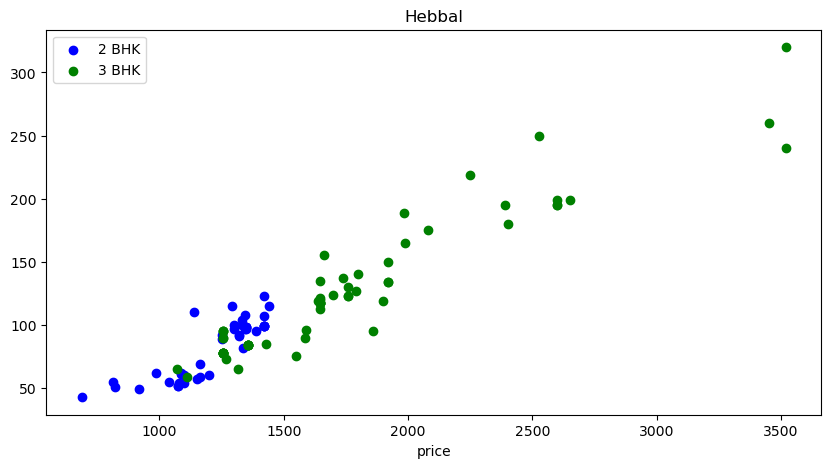

In [53]:
def scatter_plot_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(10,5))
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",label="2 BHK")
    plt.scatter(bhk3.total_sqft,bhk3.price,color="green",label="3 BHK")
    plt.xlabel("Total squre feet area")
    plt.xlabel("price")
    plt.title(location)
    plt.legend()
    
scatter_plot_chart(df7,"Hebbal")

In [54]:
# 2 bhk price is more compared on 3 bhk, so its a outlier i need to prevent this

In [55]:
def remove_bhk_outlier(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby("location"):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk]={
                "mean":np.mean(bhk_df.price_per_sqft),
                "std":np.std(bhk_df.price_per_sqft),
                "count":bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby("bhk"):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(exclude_indices,axis='index')
                
df8=remove_bhk_outlier(df7)
df8.shape

(7329, 7)

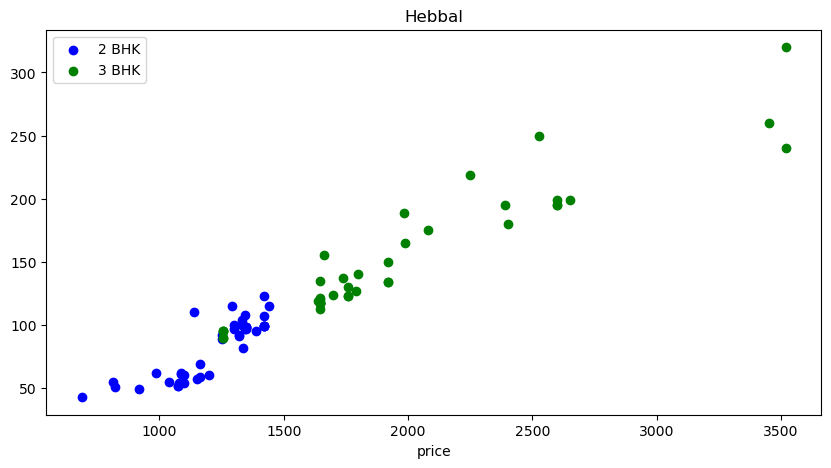

In [56]:
scatter_plot_chart(df8,"Hebbal")

In [57]:
df8.shape

(7329, 7)

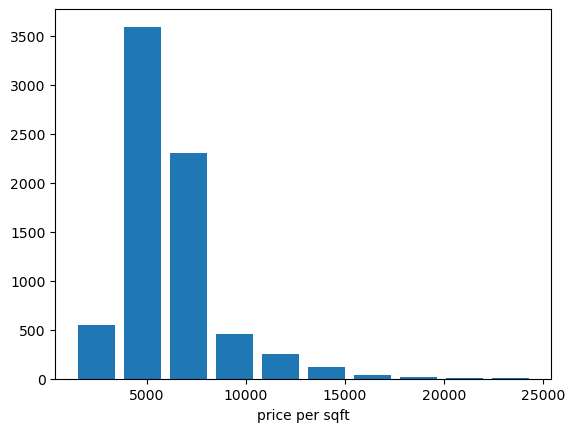

In [58]:
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("price per sqft")
plt.show()

In [59]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

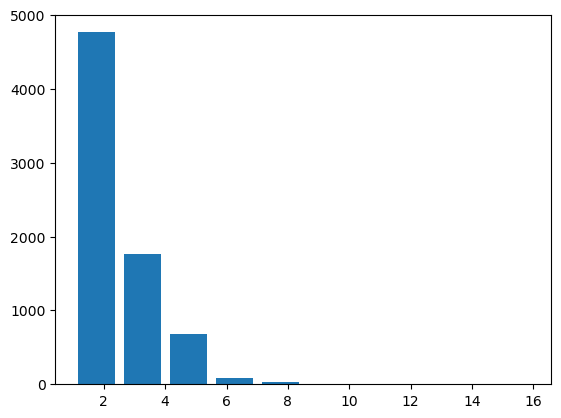

In [60]:
plt.hist(df8['bath'],rwidth=0.8)
plt.show()

In [61]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [62]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [63]:
df10=df9.drop(["size","price_per_sqft"],axis="columns")


In [64]:
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


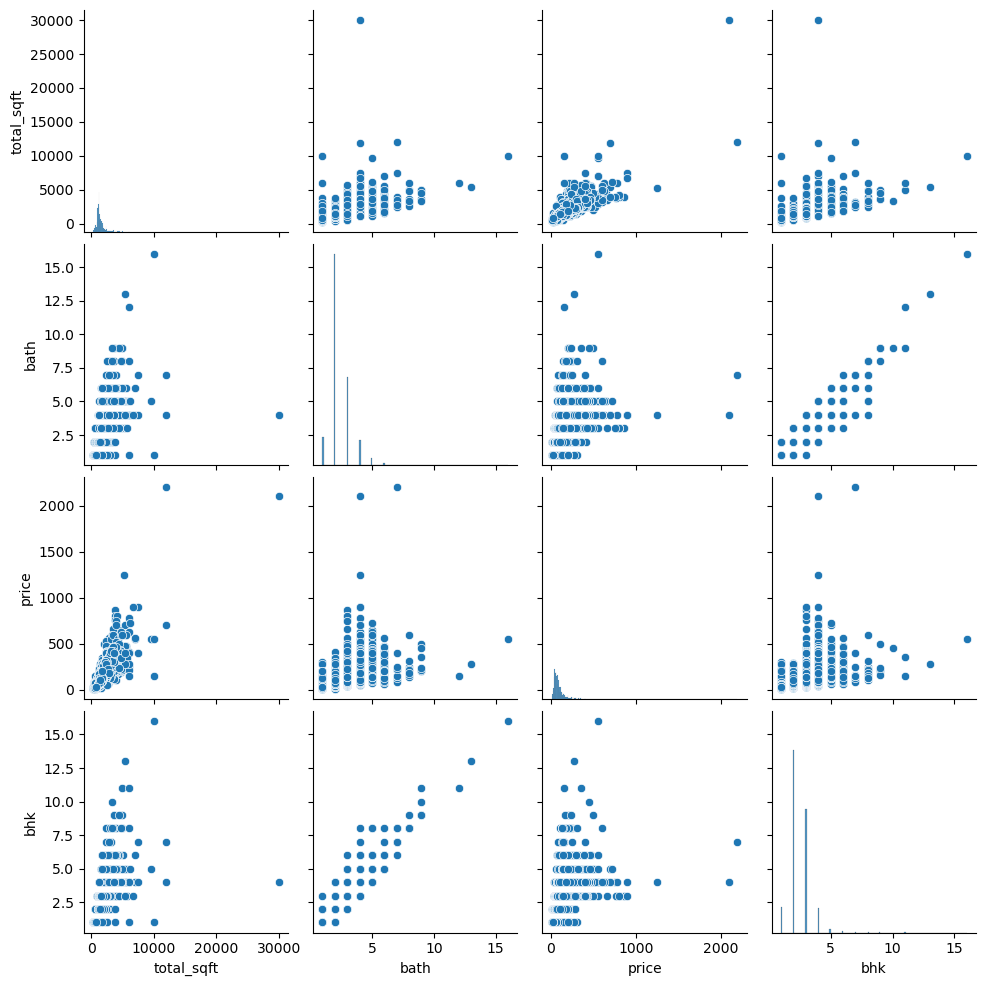

In [65]:
sns.pairplot(data=df10)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1248\1102794173.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df10.corr(),annot=True)


<Axes: >

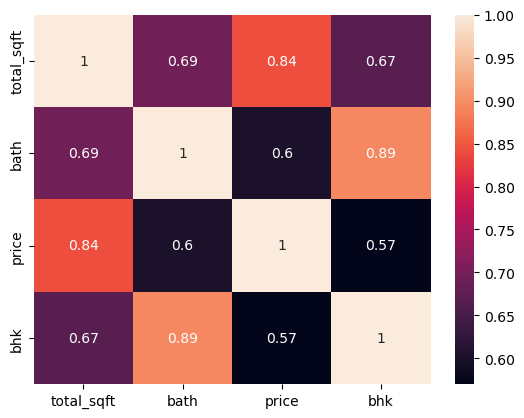

In [66]:
sns.heatmap(df10.corr(),annot=True)

In [67]:
dummies=pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df11=pd.concat([df10,dummies.drop("other",axis="columns")],axis="columns")
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df12=df11.drop("location",axis="columns")
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df12.shape

(7251, 245)

In [71]:
x=df12.drop("price",axis="columns")
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
y=df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [77]:
lr.score(x_test,y_test)*100

84.52277697874368

In [78]:
lr.score(x_train,y_train)*100

85.41850010771192

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [80]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
p=cross_val_score(LinearRegression(),x,y,cv=cv)
Li_sco=(p*100).mean()
Li_sco

81.83540750696325

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
p=cross_val_score(DecisionTreeRegressor(),x,y,cv=cv)
dt_sco2=(p*100).mean()
dt_sco2

71.32068211022703

In [83]:
from sklearn.linear_model import Lasso

In [84]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
p=cross_val_score(Lasso(),x,y,cv=cv)
Ls_sco3=(p*100).mean()
Ls_sco3

68.74286616666977

In [85]:
from sklearn.svm import SVR
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
p=cross_val_score(SVR(),x,y,cv=cv)
svm_sco4=(p*100).mean()
svm_sco4

55.857904768939036

In [86]:
compare_score=pd.DataFrame({"model":["Linear_Regression","Decision_tress",'Lasso_Regression','SVR'],
                            "Score":[Li_sco,dt_sco2,Ls_sco3,svm_sco4]})
compare_score

,model,Score
0,Linear_Regression,81.835408
1,Decision_tress,71.320682
2,Lasso_Regression,68.742866
3,SVR,55.857905


In [87]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [88]:
np.where(x.columns=="Indira Nagar")[0][0]

116

In [89]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    
    X=np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=bhk
    if loc_index >=0:
        X[loc_index] = 1
    return lr.predict([X])[0]

In [90]:
predict_price("Indira Nagar",1000,2,3)

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


179.50527707582472

In [91]:
predict_price("Vijayanagar",1000,2,3)

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


60.524215981564836

In [92]:
import pickle
with open("Banglore_home_prices_model.pickle","wb") as f:
    pickle.dump(lr,f)

In [93]:
import json
columns={
    "data_columns" :[col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))